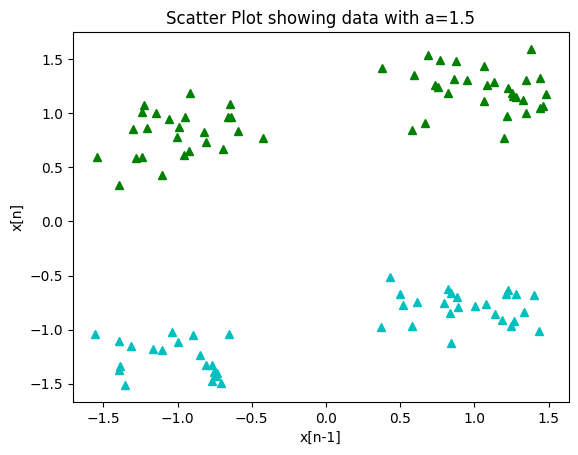

In [ ]:
import numpy as np #numerical tools
import scipy.signal as sp #signal processing tools
import matplotlib.pyplot as plt

def data(N,a):
   N=N+3
   h=np.array([1,a])
   y=np.sign(np.random.randn(N,))
   y=np.reshape(y,len(y))
   t=np.arange(N)
   z=np.convolve(h,y)
   z=z[1:N-1]
   y=y[2:N-1]
   X=np.array([z[0:N-3],z[1:N-2]])+0.2*np.random.randn(2,N-3)
   return X,y
X,y=data(100,0.2)

ind1=np.where(y==1)
ind2=np.where(y==-1)
plt.plot(X[0,ind1],X[1,ind1],'g^')
plt.plot(X[0,ind2],X[1,ind2],'c^')
plt.xlabel('x[n-1]')
plt.ylabel('x[n]')
plt.title("Scatter Plot showing data with a=1.5")
plt.show()

In [ ]:
class ridge:
    # Here you put whatever help you want and then you can print it by calling the __doc__ variable. See the last cell of this notebook.
  """'ridge' This is a ridge regression class. It needs to get function inv with "from numpy.linalg import inv".
      clf=ridge(gamma=0.001,nonlinear=False), where a is a positive scalar.
  """

  def __init__(self,gamma=0.001,nonlinear=False): # Define the internal variable gamma. If nonlinear = True, it runs with the Volterra expansion
    self.gamma_ = gamma
    self.nonlinear=nonlinear

  def fit(self, X, y):
    X_=self.mapping(X)
    d=X_.shape[1]
    self.w_=inv(X_.T@X_+self.gamma_*np.identity(d))@X_.T@y # compute the optimal weights and store them in the internal variable.

  def predict(self,X):
    X_=self.mapping(X)
    y_=X_@self.w_  # This is the prediction.
    return y_

  # This part of the class is not strictly necessary for the homework.

  def crossval(self, X, y): # Instead of a fit, we could do a crossvalidation of gamma
                            # with the training data using the method fit.

    # Estimate the interval for gamma
    X_=self.mapping(X)
    Nint=20
    N=X.shape[0]                         # Number of samples
    T=np.log10(np.trace(X_.T@X_)/N)      # This is the trace of the autocorrelation matrix
    gamma_int=np.logspace(T-1, T+1,Nint) # Interval of gamma values

    # The next block of code is the Leave-One-Out crossvalidation
    d=X.shape[1]
    E=np.zeros(Nint) # Array for the validation errors
    for j in range(Nint): # Do it for all values of Gamma
      for i in range(N):  # Do it for all samples
        Xtr=np.concatenate((X[:i,:],X[i+1:,:]))# Extract the training data
        Xval=X[i,:].reshape(1,d)               # Extract sample i as validation data
        ytr=np.concatenate((y[:i],y[i+1:]))    # Extract the training regressors
        yval=y[i]                              # Extract the validation regressor
        self.gamma_=gamma_int[j]               # Pick a value of gamma
        self.fit(Xtr, ytr)                     # Do a training
        E[j]=E[j]+(yval-self.predict(Xval))**2 # Do a prediction, compute the  error and accumulate it
                                               # E[j] is the accumulated error for gamma(j)

    self.gamma_=gamma_int[np.argmin(E)]  # Pick the gamma that has the minimum error
    self.fit(X, y)                       # Train with all data for this value of gamma, and you are all done

  def mapping(self,X):
    if self.nonlinear: #This is an example on how to compute the 3rd order Volterra expansion as phi= [1,x1,x2,x1^2,x2^2,x1^3,x2^3,x1x2^2,x1^2x2]. Only valid ofr dimension d=2
      Xf=np.flip(X,axis=1)
      N=X.shape[0] # This is the number of samples
      Phi=np.concatenate((np.ones((N,1)),X,X**2,X**3,Xf**2*X),axis=1)
    else:
      Phi=X
    # Here you can code the nonlinear Volterra transformation
    return Phi

<ipython-input-130-33e92ad52f5e>:13: UserWarning: The following kwargs were not used by contour: 'color'
  plt.contour(xx, yy, Z, levels=0, color="b")


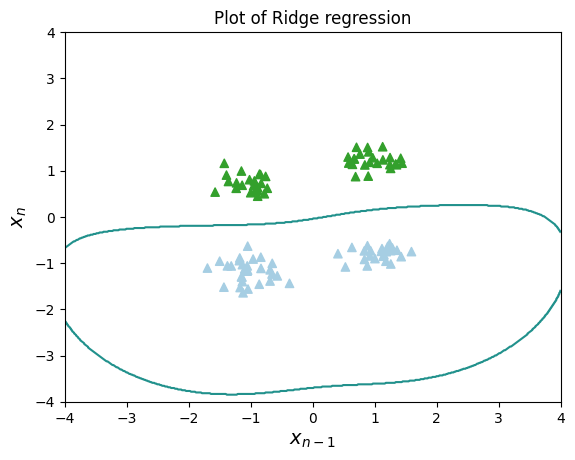

In [ ]:
def plot_decision_function(classifier,  X, y,  limits=(-4,4), title=""):
    # It is not important to understand how this works, though it is not difficult to read this code.
    # The input is a trained linear or nonlinear classifier. The classifier has to have a method .predict with the format predict(X,y).
    # The data to be predicted corresponds to a grid in the plane and it is generated iternally, so not input data is necessary.
    # Parameters:
    #     classifier: classifier object
    #     X, y:       training data
    #     limits:     tuple (x_limit, y_limit), optional./ By default (-4,4)
    #     title:      string with the desired title for the graphic. Optional, empty by default.
    xx, yy = np.meshgrid(np.linspace(limits[0], limits[1], 500), np.linspace(-4, 4, 500))
    Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contour(xx, yy, Z, levels=0, color="b")
    plt.scatter(
        X[:, 0],
        X[:, 1],
        c=y,
        alpha=1,
        marker="^",
        cmap=plt.cm.Paired,
        vmin=0,
        vmax=4
        )
    plt.ylabel(r'$x_n$',fontsize=14)
    plt.xlabel(r'$x_{n-1}}$',fontsize=14)
    plt.title(title)
    plt.show()

X,y=data(100,0.2) # Generate the data
X=X.T             # The data must be in row vectors

#clf = ridge(nonlinear=True)      # Declare a ridge regression object. Here we do not fix gamma, because there is a default value inside
clf=svm.SVC()
clf.fit(X, y)

x=X[1,:]
x.shape

from sklearn import svm
clf = svm.SVC()
clf.fit(X, y)

plot_decision_function(classifier=clf, limits=(-4,4), title="Plot of Ridge regression",X=X,y=y)
